In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os
tf.compat.v1.enable_eager_execution()


In [3]:
def prepare_data(df, target_column='Close', window_size=7):
    features = df.drop(columns=['Date', 'Stock Name', target_column])  # Dropping non-numeric columns
    target = df[target_column].values  # Stock price (Close)
    
    # Create data structure with window_size time steps
    x, y = [], []
    for i in range(window_size, len(df)):
        x.append(features.iloc[i-window_size:i, :].values)  # Using last 'window_size' rows as input
        y.append(target[i])  # Predicting the next day's stock price 
    
    return np.array(x), np.array(y)


In [4]:
# Function to create and train the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=55, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=55, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [5]:
# data_dir = r"C:\Users\prajjwal\Desktop\College-project\data\train_data"
# model_save_dir = r"C:\Users\prajjwal\Desktop\College-project\data\model"
# data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# # Try to load the model, else create a new one
# try:
#     model = load_model(os.path.join(model_save_dir, "model1.h5"))
#     print("Model loaded successfully.")
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# except:
#     print("Model not found, creating a new one.")
#     # Create a new model based on the first file to determine input shape
#     sample_df = pd.read_csv(os.path.join(data_dir, data_files[0]))
#     x_sample, _ = prepare_data(sample_df)  # Prepare data for the first sample to get the shape
#     model = create_lstm_model((x_sample.shape[1], x_sample.shape[2]))  # (timesteps, features)

# # Loop over all CSV files and train the model on each
# for file_name in data_files:

#     file_path = os.path.join(data_dir, file_name)
#     df = pd.read_csv(file_path)

#     # Prepare the data for training
#     x, y = prepare_data(df)

#     # Ensure x and y are numpy arrays
#     x = np.array(x)
#     y = np.array(y)

#     # Reshape data for LSTM (samples, timesteps, features)
#     x = x.reshape(x.shape[0], x.shape[1], x.shape[2])  # Ensure correct 3D shape (samples, timesteps, features)
    
#     # Define ReduceLROnPlateau callback
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)

#     # Train the model on the current dataset (you can add validation if needed)
#     model.fit(x, y, epochs=70, batch_size=32, callbacks=[reduce_lr])

#     print(f"Model trained on {file_name}")


# # Optionally, save the trained model after training on all datasets
# model_save_path = os.path.join(model_save_dir, "model1.h5")
# model.save(model_save_path)

In [6]:
model_save_path = os.path.join(r"C:\Users\prajjwal\Desktop\College-project\data\model", "model1.h5")
model = load_model(model_save_path)


In [7]:
test = pd.read_csv(r"C:\Users\prajjwal\Desktop\College-project\data\test_data\pypl_data.csv")
test2 = pd.read_csv(r"C:\Users\prajjwal\Desktop\College-project\data\train_data\tesla_data.csv")
test3 = pd.read_csv(r"C:\Users\prajjwal\Desktop\College-project\data\test_data\xpv_data.csv")
test4 = pd.read_csv(r"C:\Users\prajjwal\Desktop\College-project\data\test_data\zs_data.csv")

x_test, y_test = prepare_data(test)
x2_test, y2_test = prepare_data(test2)
x3_test, y3_test = prepare_data(test3)
x4_test, y4_test = prepare_data(test4)

In [14]:
y_pred = model.predict(x_test)
y2_pred = model.predict(x2_test)
y3_pred = model.predict(x3_test)
y4_pred = model.predict(x4_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [15]:
def get_metrics(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)

    # Print evaluation metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print()

In [16]:
get_metrics(y_test,y_pred)
get_metrics(y2_test, y2_pred)
get_metrics(y3_test, y3_pred)
get_metrics(y4_test,y4_pred)

Mean Absolute Error (MAE): 38.79689931481834
Mean Squared Error (MSE): 2594.729080828641
Root Mean Squared Error (RMSE): 50.938483299256575
R-squared (R²): -0.2977655574181499

Mean Absolute Error (MAE): 31.668610677913744
Mean Squared Error (MSE): 1761.9325609330838
Root Mean Squared Error (RMSE): 41.97538041439391
R-squared (R²): 0.16296134116480043

Mean Absolute Error (MAE): 53.528056646853074
Mean Squared Error (MSE): 5383.494576817829
Root Mean Squared Error (RMSE): 73.37230115525769
R-squared (R²): -0.20219727940691823

Mean Absolute Error (MAE): 57.44389475608359
Mean Squared Error (MSE): 3362.6802200061525
Root Mean Squared Error (RMSE): 57.98862147013112
R-squared (R²): -51.43928321655496



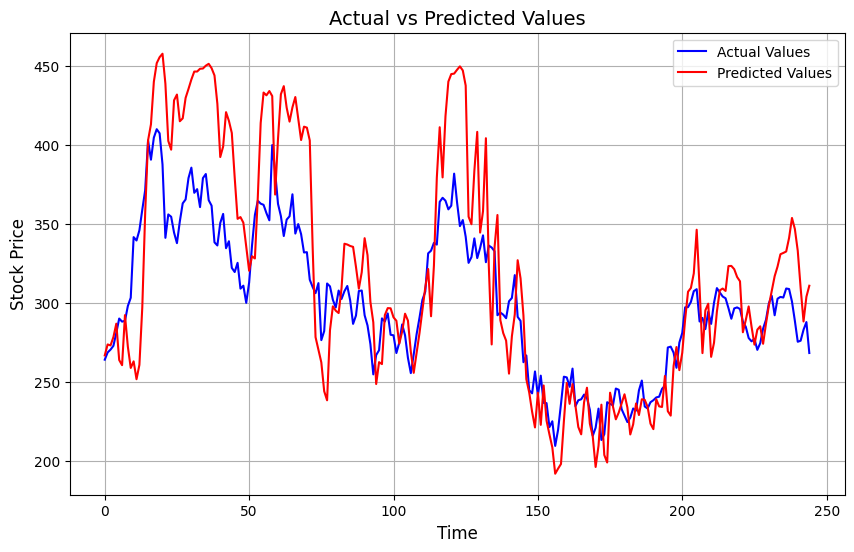

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y2_test, color='blue', label='Actual Values')

# Plot predicted values
plt.plot(y2_pred, color='red', label='Predicted Values')

# Add title and labels
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Time', fontsize=12)  # or any other appropriate label for x-axis
plt.ylabel('Stock Price', fontsize=12)  # Adjust this based on your prediction target

# Add legend to differentiate actual and predicted lines
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


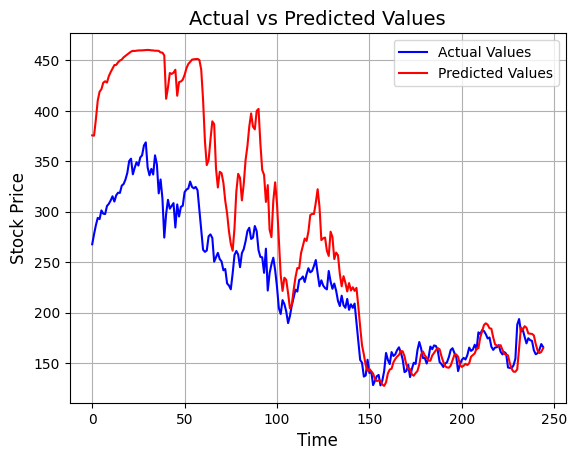

In [12]:
# Plot actual values
plt.plot(y3_test, color='blue', label='Actual Values')

# Plot predicted values
plt.plot(y3_pred, color='red', label='Predicted Values')

# Add title and labels
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Time', fontsize=12)  # or any other appropriate label for x-axis
plt.ylabel('Stock Price', fontsize=12)  # Adjust this based on your prediction target

# Add legend to differentiate actual and predicted lines
plt.legend()

# Display the plot
plt.grid(True)
plt.show()